# Análise Exploratória


##Importação e normalização da Base de dados

###Importação

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/Exercício 1 - Importação de dados - Eletreletrônicos csv.csv'

In [ ]:
dados = pd.read_csv(url)

###Cabeçalho da base de dados

In [ ]:
dados.head(10)

,data;loja;local;vendedor;produto;preço
0,03/01/2022;Filial São Paulo;Santo André;Leadro...
1,03/01/2022;Matriz São Paulo;São Paulo;Flavio;G...
2,03/01/2022;Filial Bahia;Salvador;Francisco;Cel...
3,03/01/2022;Matriz São Paulo;São Paulo;Alessand...
4,03/01/2022;Matriz São Paulo;São Paulo;João;TV;...
5,03/01/2022;Filial Rio de Janeiro;Rio de Janeir...
6,03/01/2022;Filial Bahia;Salvador;Francisco;Cel...
7,03/01/2022;Filial São Paulo;Santo André;Leadro...
8,03/01/2022;Matriz São Paulo;São Paulo;Alessand...
9,03/01/2022;Filial Minas Gerais;Belo Horizonte;...


###MudarSeparador

In [ ]:
dados = pd.read_csv(url, sep=';')

In [ ]:
dados

,data,loja,local,vendedor,produto,preço
0,03/01/2022,Filial São Paulo,Santo André,Leadro,TV,4566.0
1,03/01/2022,Matriz São Paulo,São Paulo,Flavio,Geladeira,5666.0
2,03/01/2022,Filial Bahia,Salvador,Francisco,Celular,3500.0
3,03/01/2022,Matriz São Paulo,São Paulo,Alessandra,Celular,3500.0
4,03/01/2022,Matriz São Paulo,São Paulo,João,TV,4566.0
...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN


### Extrair dados nulos

Parte inferior da base de dados

In [ ]:
dados.tail()

,data,loja,local,vendedor,produto,preço
994,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN


Mostrar dados nulos

In [ ]:
dados.isnull()

,data,loja,local,vendedor,produto,preço
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
994,True,True,True,True,True,True
995,True,True,True,True,True,True
996,True,True,True,True,True,True
997,True,True,True,True,True,True


In [ ]:
dados_nulos = dados.isnull()

In [ ]:
dados_nulos

,data,loja,local,vendedor,produto,preço
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
994,True,True,True,True,True,True
995,True,True,True,True,True,True
996,True,True,True,True,True,True
997,True,True,True,True,True,True


Consultar dados nulos na tabela

In [ ]:
dados_nulos.query('data == True')

,data,loja,local,vendedor,produto,preço
249,True,True,True,True,True,True
250,True,True,True,True,True,True
251,True,True,True,True,True,True
252,True,True,True,True,True,True
253,True,True,True,True,True,True
...,...,...,...,...,...,...
994,True,True,True,True,True,True
995,True,True,True,True,True,True
996,True,True,True,True,True,True
997,True,True,True,True,True,True


Remover dados nulos

In [ ]:
dados_nulos.query('data == True').index

Index([249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
       ...
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998],
      dtype='int64', length=750)

In [ ]:
remover_linhas = dados_nulos.query('data == True').index

In [ ]:
dados.drop(remover_linhas, axis=0, inplace=True)

In [ ]:
dados

,data,loja,local,vendedor,produto,preço
0,03/01/2022,Filial São Paulo,Santo André,Leadro,TV,4566.0
1,03/01/2022,Matriz São Paulo,São Paulo,Flavio,Geladeira,5666.0
2,03/01/2022,Filial Bahia,Salvador,Francisco,Celular,3500.0
3,03/01/2022,Matriz São Paulo,São Paulo,Alessandra,Celular,3500.0
4,03/01/2022,Matriz São Paulo,São Paulo,João,TV,4566.0
...,...,...,...,...,...,...
244,05/01/2022,Filial Santa Catarina,Florianópolis,Beatriz,fone de ouvido,150.0
245,05/01/2022,Filial Santa Catarina,Florianópolis,Beatriz,notebook,6000.0
246,05/01/2022,Matriz São Paulo,São Paulo,João,Celular,3500.0
247,05/01/2022,Filial São Paulo,Santo André,Maria,Cafeteira,1670.0


## Dados da Tabela

In [ ]:
dados.shape

(249, 6)

In [ ]:
dados.columns

Index(['data', 'loja', 'local', 'vendedor', 'produto', 'preço'], dtype='object')

mudar nome da coluna

In [ ]:
dados.columns = ['data', 'loja', 'Local', 'vendedor', 'produto', 'preço']

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   data      249 non-null    object 
 1   loja      249 non-null    object 
 2   local     249 non-null    object 
 3   vendedor  249 non-null    object 
 4   produto   249 non-null    object 
 5   preço     249 non-null    float64
dtypes: float64(1), object(5)
memory usage: 11.8+ KB


In [ ]:
dados.head(10)

,data,loja,local,vendedor,produto,preço
0,03/01/2022,Filial São Paulo,Santo André,Leadro,TV,4566.0
1,03/01/2022,Matriz São Paulo,São Paulo,Flavio,Geladeira,5666.0
2,03/01/2022,Filial Bahia,Salvador,Francisco,Celular,3500.0
3,03/01/2022,Matriz São Paulo,São Paulo,Alessandra,Celular,3500.0
4,03/01/2022,Matriz São Paulo,São Paulo,João,TV,4566.0
5,03/01/2022,Filial Rio de Janeiro,Rio de Janeiro,Alex,TV,4566.0
6,03/01/2022,Filial Bahia,Salvador,Francisco,Celular,3500.0
7,03/01/2022,Filial São Paulo,Santo André,Leadro,tablet,5000.0
8,03/01/2022,Matriz São Paulo,São Paulo,Alessandra,Cadeira,600.0
9,03/01/2022,Filial Minas Gerais,Belo Horizonte,Jorge,fone de ouvido,150.0


In [ ]:
dados.iloc[5:15]

,data,loja,local,vendedor,produto,preço
5,03/01/2022,Filial Rio de Janeiro,Rio de Janeiro,Alex,TV,4566.0
6,03/01/2022,Filial Bahia,Salvador,Francisco,Celular,3500.0
7,03/01/2022,Filial São Paulo,Santo André,Leadro,tablet,5000.0
8,03/01/2022,Matriz São Paulo,São Paulo,Alessandra,Cadeira,600.0
9,03/01/2022,Filial Minas Gerais,Belo Horizonte,Jorge,fone de ouvido,150.0
10,03/01/2022,Matriz São Paulo,São Paulo,Flavio,Celular,3500.0
11,03/01/2022,Filial Minas Gerais,Belo Horizonte,Ana,TV,4566.0
12,03/01/2022,Filial Minas Gerais,Belo Horizonte,Jorge,TV,4566.0
13,03/01/2022,Matriz São Paulo,São Paulo,Alessandra,tablet,5000.0
14,03/01/2022,Filial Santa Catarina,Florianópolis,Beatriz,notebook,6000.0


## Informações de colunas

Trabalhar com colunas específicas

In [ ]:
dados.vendedor

0          Leadro
1          Flavio
2       Francisco
3      Alessandra
4            João
          ...    
244       Beatriz
245       Beatriz
246          João
247         Maria
248           Ana
Name: vendedor, Length: 249, dtype: object

In [ ]:
dados['vendedor']

0          Leadro
1          Flavio
2       Francisco
3      Alessandra
4            João
          ...    
244       Beatriz
245       Beatriz
246          João
247         Maria
248           Ana
Name: vendedor, Length: 249, dtype: object

In [ ]:
dados[['vendedor', 'produto']]

,vendedor,produto
0,Leadro,TV
1,Flavio,Geladeira
2,Francisco,Celular
3,Alessandra,Celular
4,João,TV
...,...,...
244,Beatriz,fone de ouvido
245,Beatriz,notebook
246,João,Celular
247,Maria,Cafeteira


Funções aplicadas em colunas

In [ ]:
dados.vendedor.unique()

array(['Leadro', 'Flavio', 'Francisco', 'Alessandra', 'João', 'Alex',
       'Jorge', 'Ana', 'Beatriz', 'Bruna', 'Camila', 'Maria', 'Luiza',
       'Osvaldo', 'Marta', 'Matheus'], dtype=object)

In [ ]:
dados['vendedor'].unique()

array(['Leadro', 'Flavio', 'Francisco', 'Alessandra', 'João', 'Alex',
       'Jorge', 'Ana', 'Beatriz', 'Bruna', 'Camila', 'Maria', 'Luiza',
       'Osvaldo', 'Marta', 'Matheus'], dtype=object)

In [ ]:
dados['preço'].mean()

3204.8353413654618

In [ ]:
dados.preço.mean()

3204.8353413654618

In [ ]:
dados['preço'].median()

3500.0

In [ ]:
dados['preço'].describe()

count     249.000000
mean     3204.835341
std      2057.576560
min       150.000000
25%       600.000000
50%      3500.000000
75%      5000.000000
max      6000.000000
Name: preço, dtype: float64

In [ ]:
dados.vendedor.value_counts()

vendedor
João          37
Alessandra    35
Beatriz       25
Leadro        23
Francisco     19
Ana           16
Luiza         16
Flavio        14
Marta         14
Alex          11
Jorge          8
Osvaldo        8
Bruna          7
Maria          7
Camila         5
Matheus        4
Name: count, dtype: int64

In [ ]:
ranking_vendedores = dados.vendedor.value_counts()

In [ ]:
ranking_produtos = dados.produto.value_counts()

In [ ]:
ranking_produtos

produto
Celular             73
fone de ouvido      41
Cadeira             28
notebook            26
tablet              25
TV                  23
Cafeteira           13
Geladeira           11
Maquina de Lavar     9
Name: count, dtype: int64

##Ordenar Valores

In [ ]:
dados.vendedor.value_counts().sort_values()

vendedor
Matheus        4
Camila         5
Bruna          7
Maria          7
Jorge          8
Osvaldo        8
Alex          11
Flavio        14
Marta         14
Ana           16
Luiza         16
Francisco     19
Leadro        23
Beatriz       25
Alessandra    35
João          37
Name: count, dtype: int64

In [ ]:
dados.vendedor.value_counts().sort_values(ascending=False)

vendedor
João          37
Alessandra    35
Beatriz       25
Leadro        23
Francisco     19
Ana           16
Luiza         16
Flavio        14
Marta         14
Alex          11
Jorge          8
Osvaldo        8
Bruna          7
Maria          7
Camila         5
Matheus        4
Name: count, dtype: int64

In [ ]:
dados['preço'].sort_values()

198     150.0
106     150.0
103     150.0
101     150.0
189     150.0
        ...  
74     6000.0
219    6000.0
84     6000.0
80     6000.0
55     6000.0
Name: preço, Length: 249, dtype: float64

## Filtrar dados por valor da celula

In [ ]:
dados.produto == 'Geladeira'

0      False
1       True
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Name: produto, Length: 249, dtype: bool

In [ ]:
filtro_por_geladeira = dados.produto == 'Geladeira'

In [ ]:
filtro_por_geladeira

0      False
1       True
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Name: produto, Length: 249, dtype: bool

In [ ]:
dados

,data,loja,local,vendedor,produto,preço
0,03/01/2022,Filial São Paulo,Santo André,Leadro,TV,4566.0
1,03/01/2022,Matriz São Paulo,São Paulo,Flavio,Geladeira,5666.0
2,03/01/2022,Filial Bahia,Salvador,Francisco,Celular,3500.0
3,03/01/2022,Matriz São Paulo,São Paulo,Alessandra,Celular,3500.0
4,03/01/2022,Matriz São Paulo,São Paulo,João,TV,4566.0
...,...,...,...,...,...,...
244,05/01/2022,Filial Santa Catarina,Florianópolis,Beatriz,fone de ouvido,150.0
245,05/01/2022,Filial Santa Catarina,Florianópolis,Beatriz,notebook,6000.0
246,05/01/2022,Matriz São Paulo,São Paulo,João,Celular,3500.0
247,05/01/2022,Filial São Paulo,Santo André,Maria,Cafeteira,1670.0


In [ ]:
dados[filtro_por_geladeira]

,data,loja,local,vendedor,produto,preço
1,03/01/2022,Matriz São Paulo,São Paulo,Flavio,Geladeira,5666.0
23,03/01/2022,Filial Bahia,Salvador,Francisco,Geladeira,5666.0
71,03/01/2022,Filial São Paulo,Santo André,Luiza,Geladeira,5666.0
96,03/01/2022,Matriz São Paulo,São Paulo,Flavio,Geladeira,5666.0
107,03/01/2022,Matriz São Paulo,São Paulo,João,Geladeira,5666.0
114,04/01/2022,Matriz São Paulo,São Paulo,Alessandra,Geladeira,5666.0
142,04/01/2022,Filial Bahia,Salvador,Francisco,Geladeira,5666.0
159,04/01/2022,Matriz São Paulo,São Paulo,João,Geladeira,5666.0
209,05/01/2022,Matriz São Paulo,São Paulo,João,Geladeira,5666.0
237,05/01/2022,Filial Santa Catarina,Florianópolis,Beatriz,Geladeira,5666.0


##Plotagem de graficos

In [ ]:
ranking_produtos

produto
Celular             73
fone de ouvido      41
Cadeira             28
notebook            26
tablet              25
TV                  23
Cafeteira           13
Geladeira           11
Maquina de Lavar     9
Name: count, dtype: int64

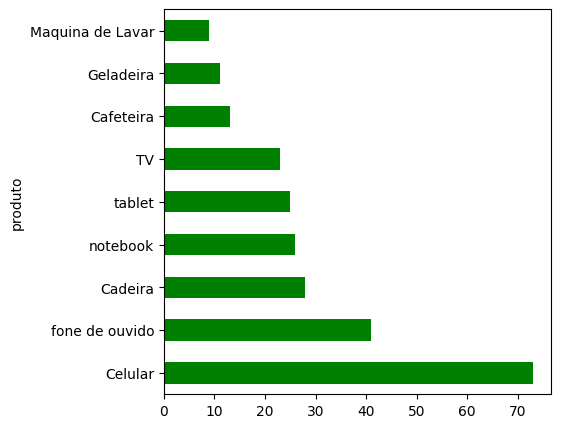

In [ ]:
ranking_produtos.plot(kind='barh', figsize=(5, 5), color ='g',);

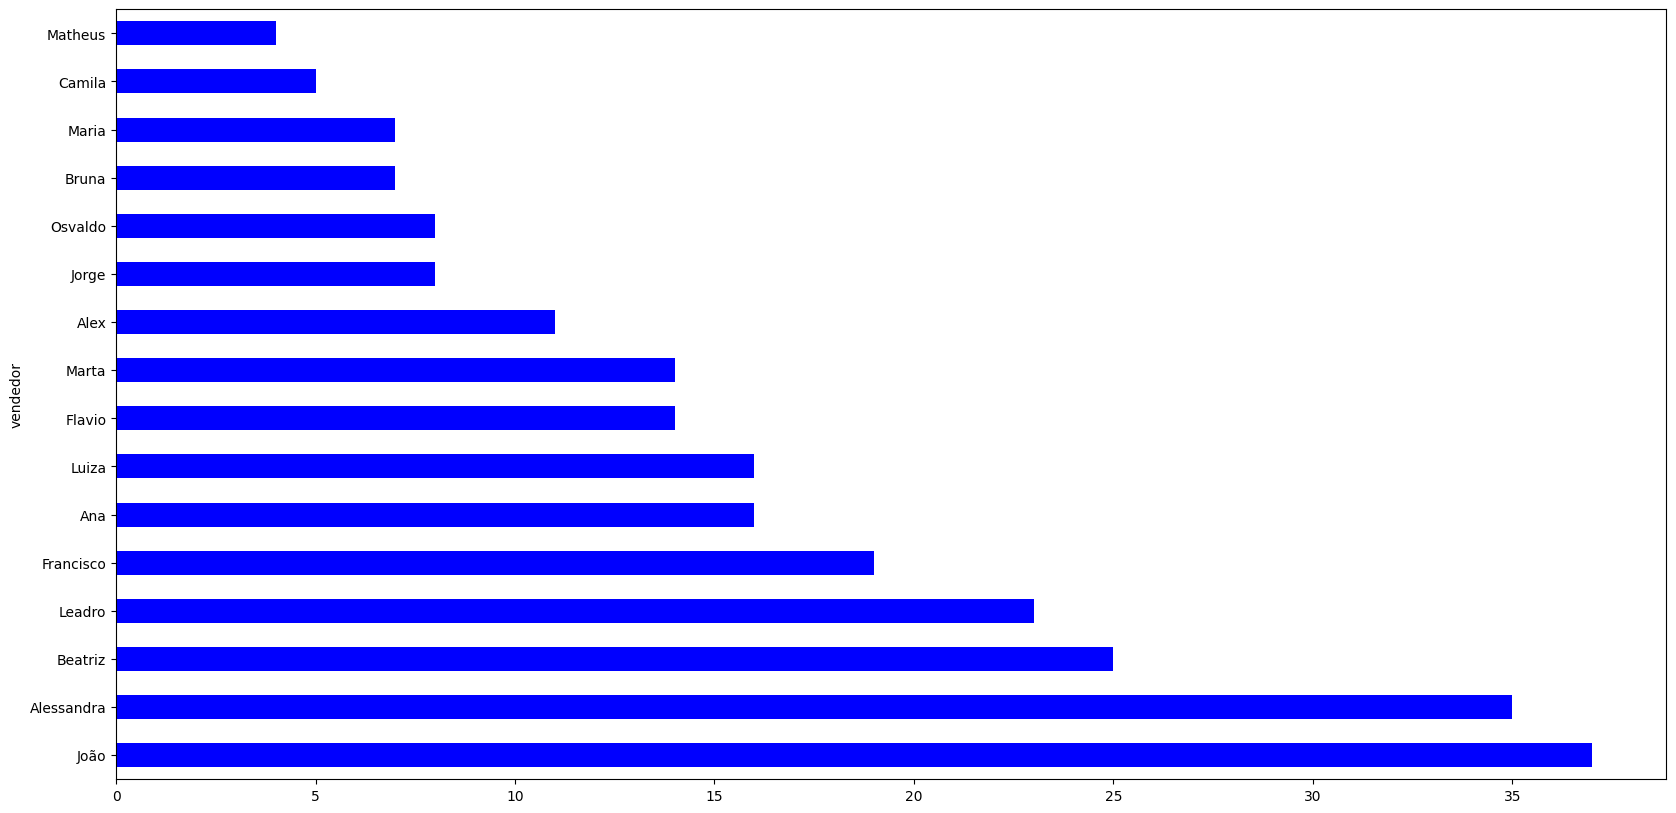

In [ ]:
ranking_vendedores.plot(kind='barh', figsize=(20, 10), color ='blue');

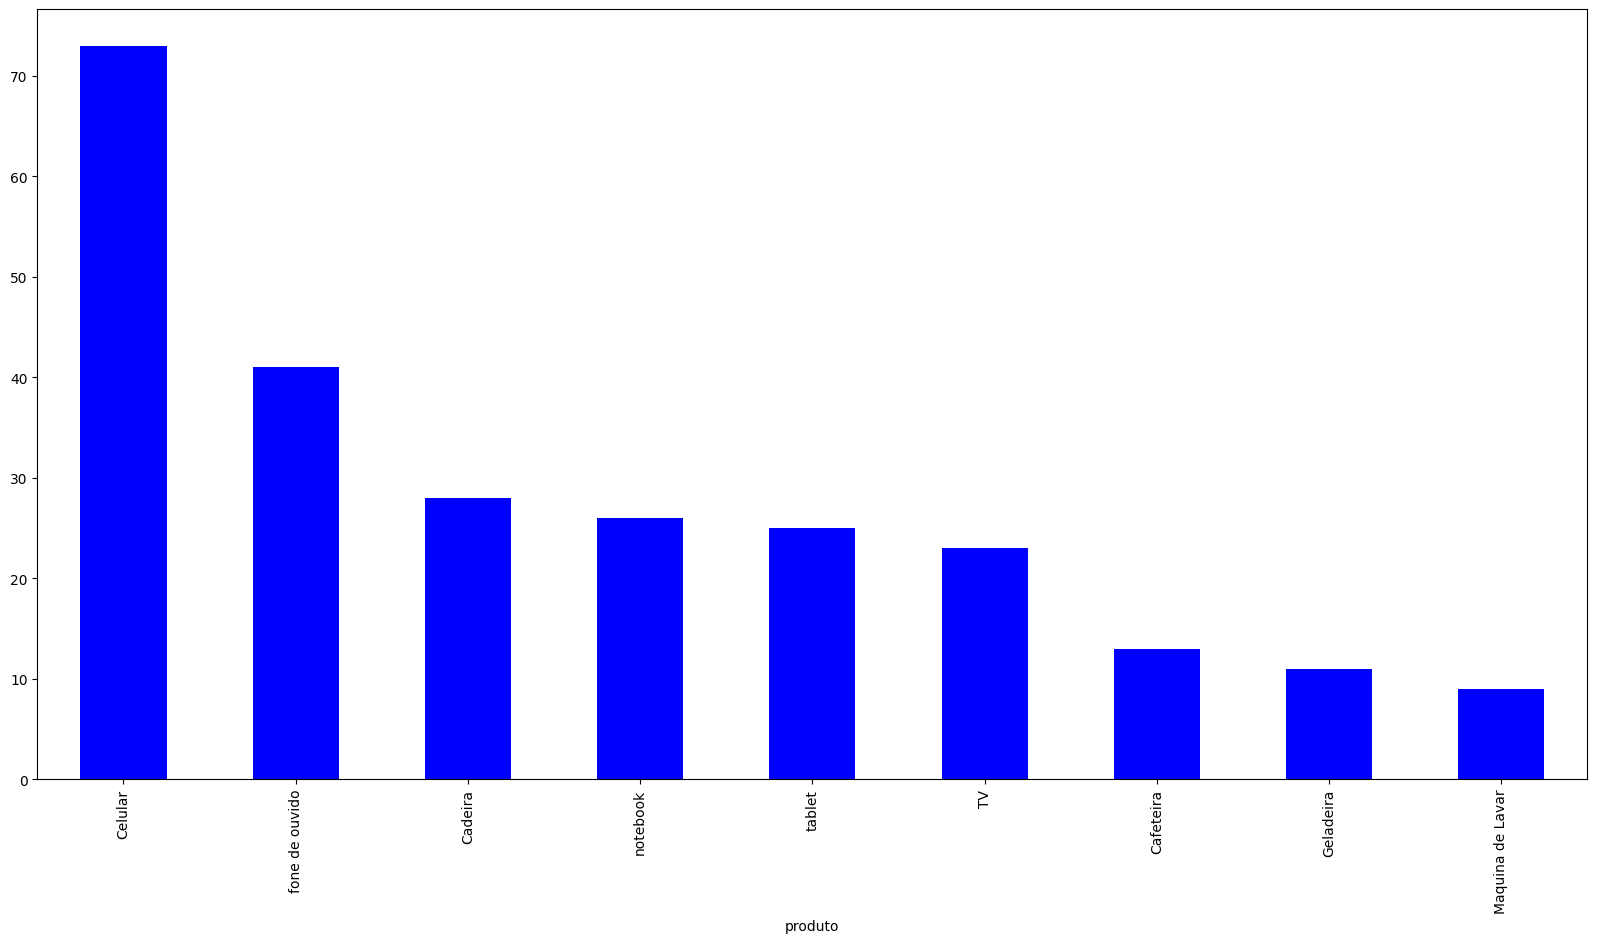

In [ ]:
ranking_produtos.plot(kind='bar', figsize=(20, 10), color ='blue');

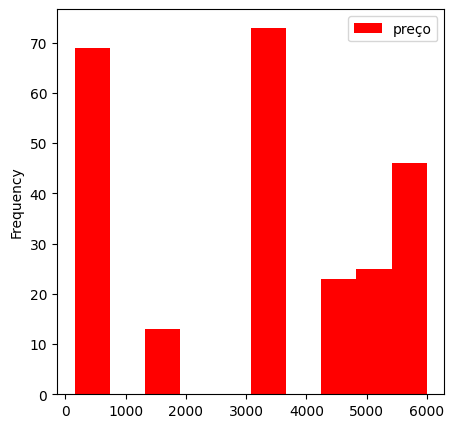

In [ ]:
dados.plot(kind='hist', figsize=(5, 5), color ='red');

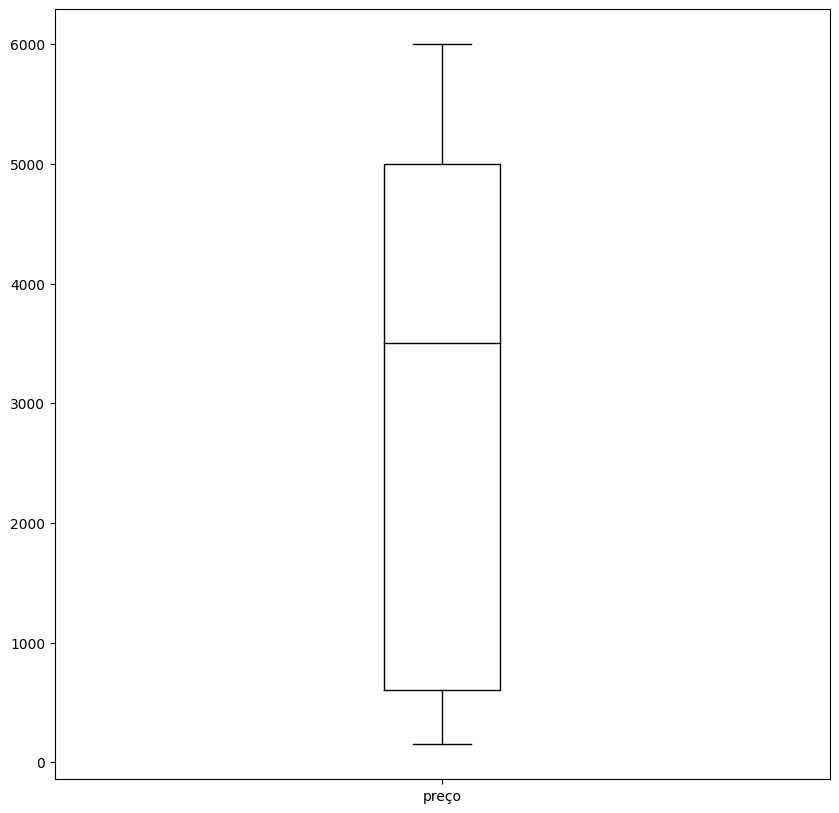

In [ ]:
dados.plot(kind='box', figsize=(10, 10), color ='black');

In [ ]:
dados.describe()

,preço
count,249.000000
mean,3204.835341
std,2057.576560
min,150.000000
25%,600.000000
50%,3500.000000
75%,5000.000000
max,6000.000000


<Axes: ylabel='count'>

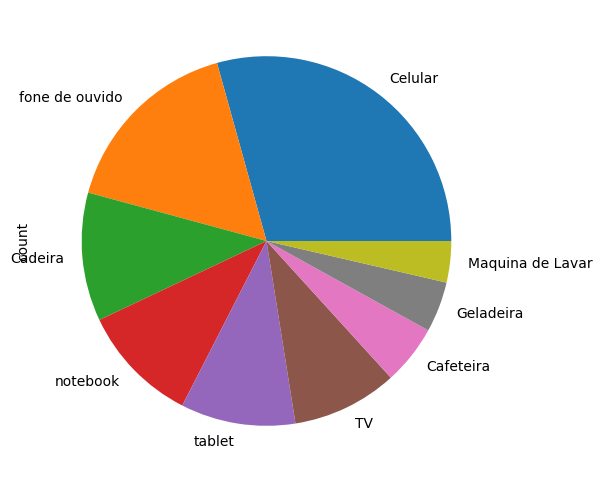

In [ ]:
ranking_produtos.plot(kind='pie',  figsize=(6, 6), legend=False)

# Exercícios

## Exercício 1 - Clinica veterinária.

Exercício 1

Através da base de dados organizar as seguintes informações

 - Segmentar por genero e plotar um grafico de pizza.
 - Segmentar por cidade e plotar um grafico de barras
 - Segmentar pela coluna como conheceu
 - histograma de atendimentos realizados
 - grafico de pizza comos tipos de animais

In [ ]:
import pandas as pd

url = '/content/drive/MyDrive/Colab Notebooks/Relatorio_Clinica_Veterinaria.xlsx'

In [ ]:
dados = pd.read_excel(url)

In [ ]:
dados.head()

,id,nome,sexo,como_conheceu,Data do Cadastro,bairro,cidade,animais_cadastrados,atendimentos_realizados,tipo,se_ani
0,1,ADENI,F,Visitando a Clínica,2022-02-16,Parque São Vicente,Mauá,1,1,cachoro,M
1,2,ALAN,M,Internet,2022-03-08,Jardim Rodolfo Pirani,São Paulo,1,2,cachoro,M
2,3,ALANI,M,Outros,2022-04-02,Jardim Zaira,Mauá,1,0,cachoro,M
3,4,ALESS,M,Internet,2022-04-11,Vila Falchi,Mauá,1,3,cachoro,M
4,5,ALINE,F,Outros,2022-03-18,Parque São Vicente,Mauá,1,3,gato,F


In [ ]:
dados.sexo.value_counts()

sexo
F    122
M     85
Name: count, dtype: int64

In [ ]:
ranking_genero = dados.sexo.value_counts()

<Axes: ylabel='count'>

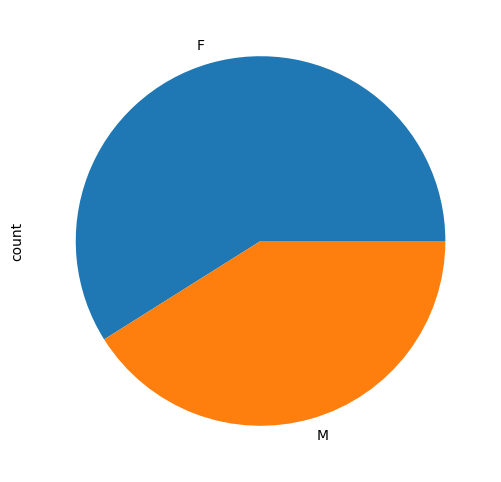

In [ ]:
ranking_genero.plot(kind='pie',  figsize=(6, 6), legend=False)

In [ ]:
dados.cidade.value_counts()

cidade
Mauá                     166
Santo André               17
São Paulo                 10
Ribeirão Pires             5
MAUA                       2
São Caetano do Sul         2
São Bernardo do Campo      1
Senador amaral             1
SAO PAULO                  1
Jacareí                    1
Barueri                    1
Name: count, dtype: int64

In [ ]:
ranking_cidade = dados.cidade.value_counts().head(6)

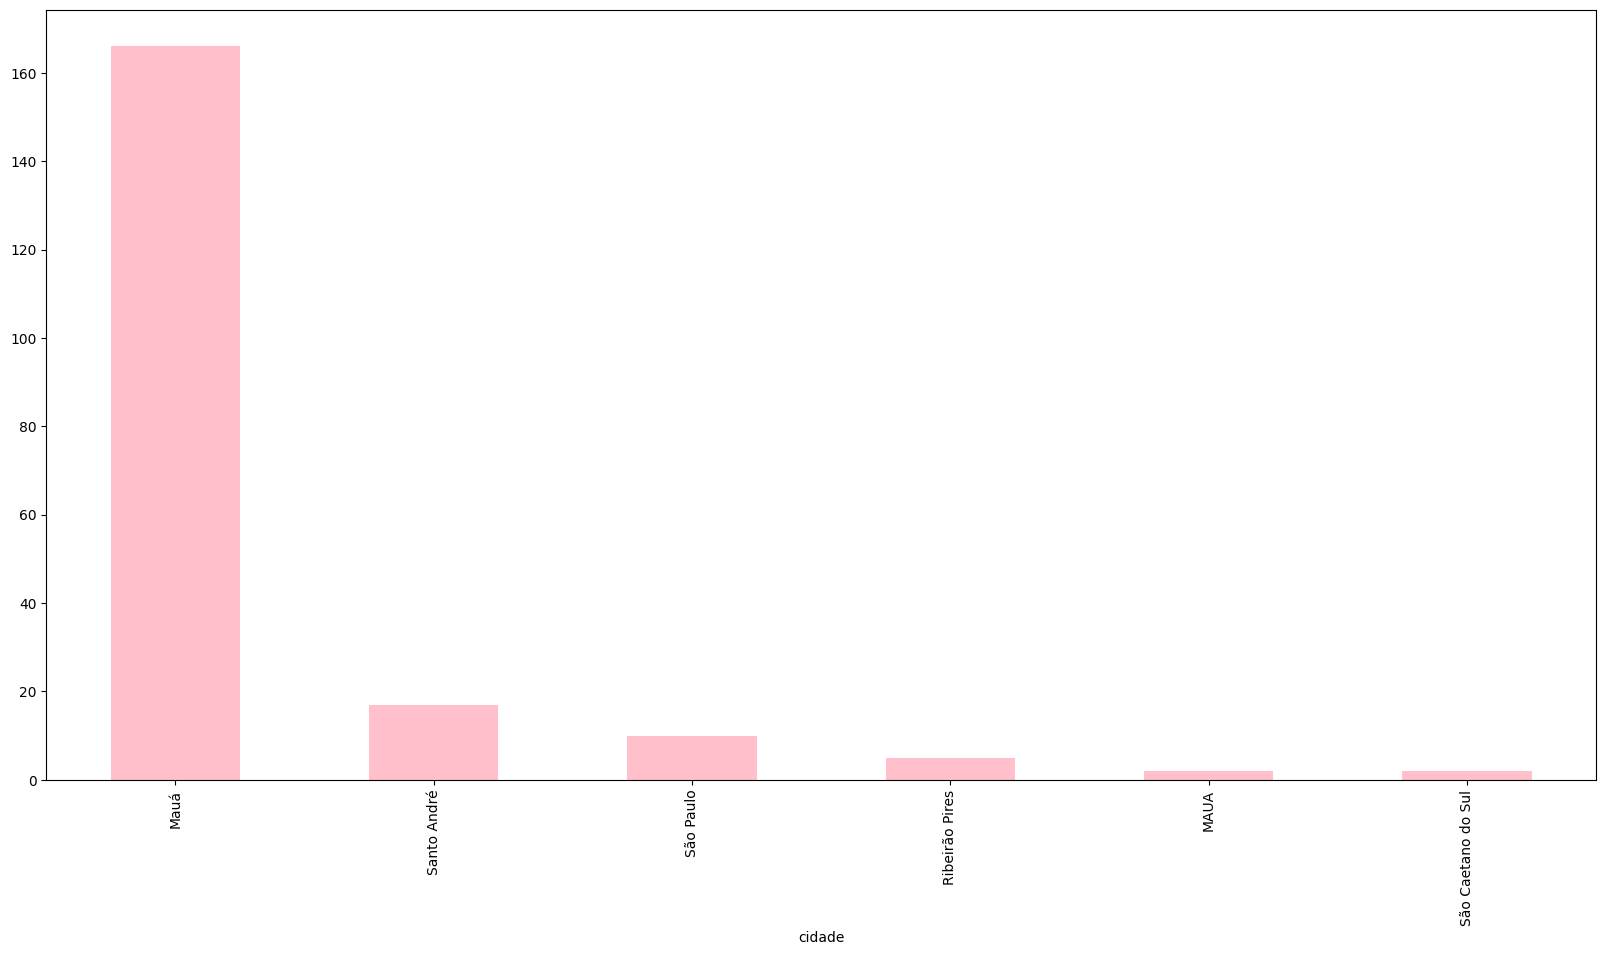

In [ ]:
ranking_cidade.plot(kind='bar', figsize=(20, 10), color ='pink');

In [ ]:
ranking_como_conheceu = dados.como_conheceu.value_counts()

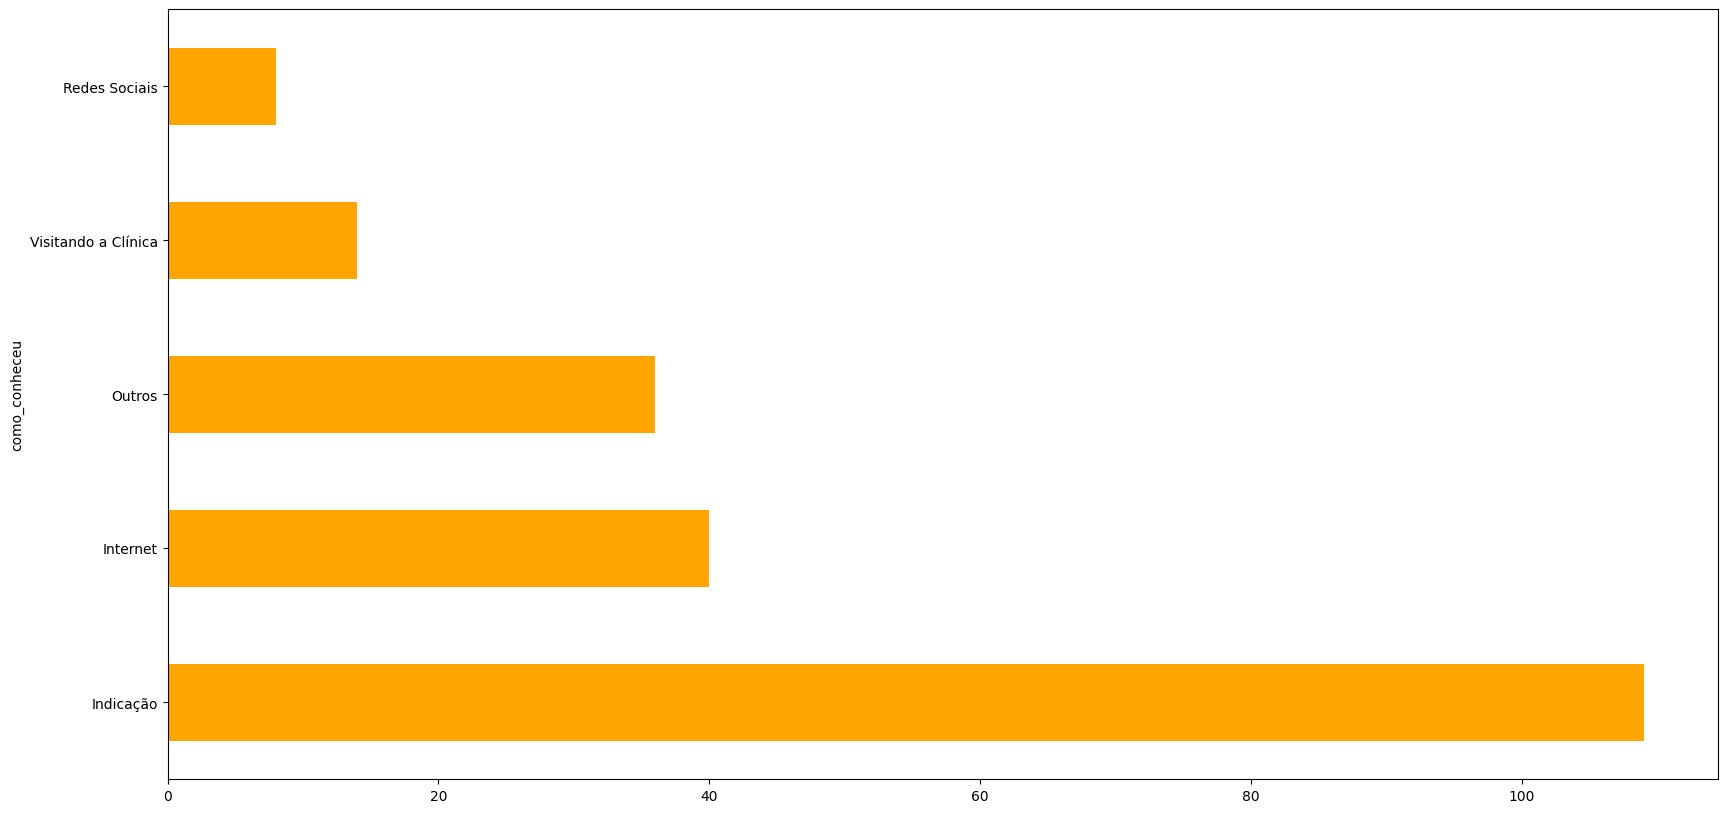

In [ ]:
ranking_como_conheceu.plot(kind='barh', figsize=(20, 10), color ='orange');

In [ ]:
dados.atendimentos_realizados.value_counts()

atendimentos_realizados
1     88
2     54
3     26
4     19
0     11
5      3
6      2
8      1
11     1
7      1
9      1
Name: count, dtype: int64

In [ ]:
ranking_atendimentos = dados.atendimentos_realizados.value_counts()

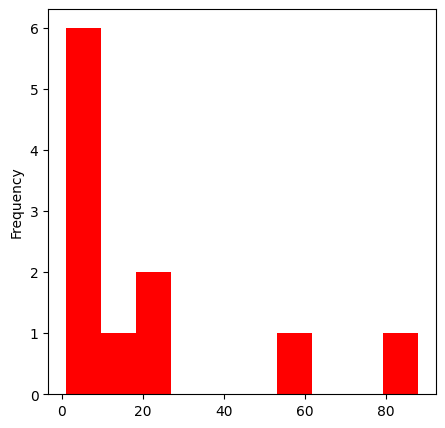

In [ ]:
ranking_atendimentos.plot(kind='hist', figsize=(5, 5), color ='red');

In [ ]:
dados.tipo.value_counts()

tipo
cachoro    118
ave         53
gato        27
Name: count, dtype: int64

In [ ]:
ranking_tipo = dados.tipo.value_counts()

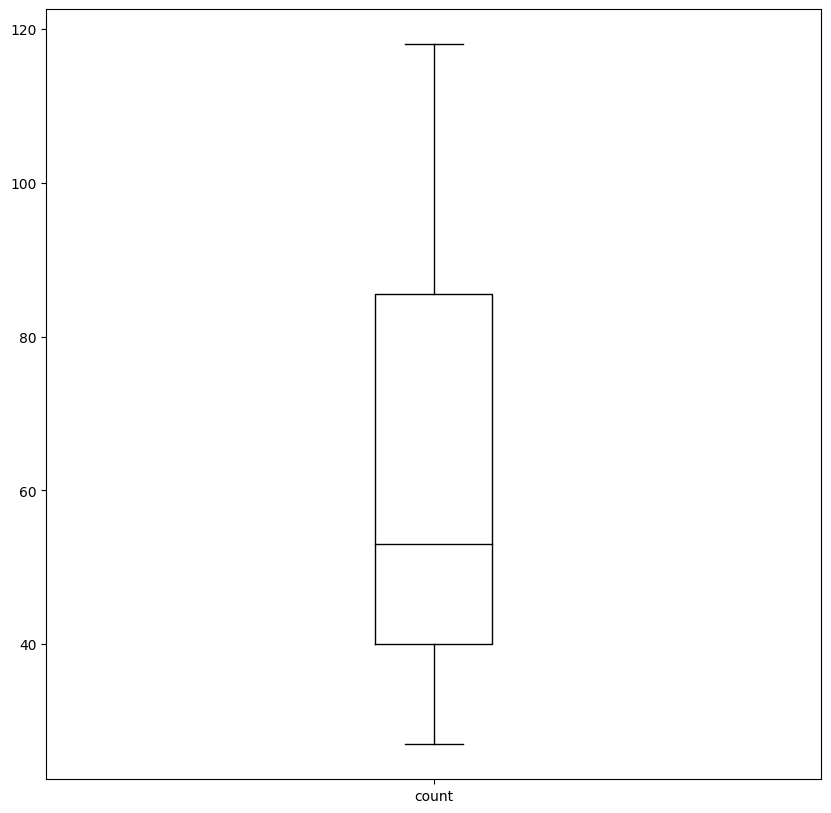

In [ ]:
ranking_tipo.plot(kind='box', figsize=(10, 10), color ='black');

## Exercício 2 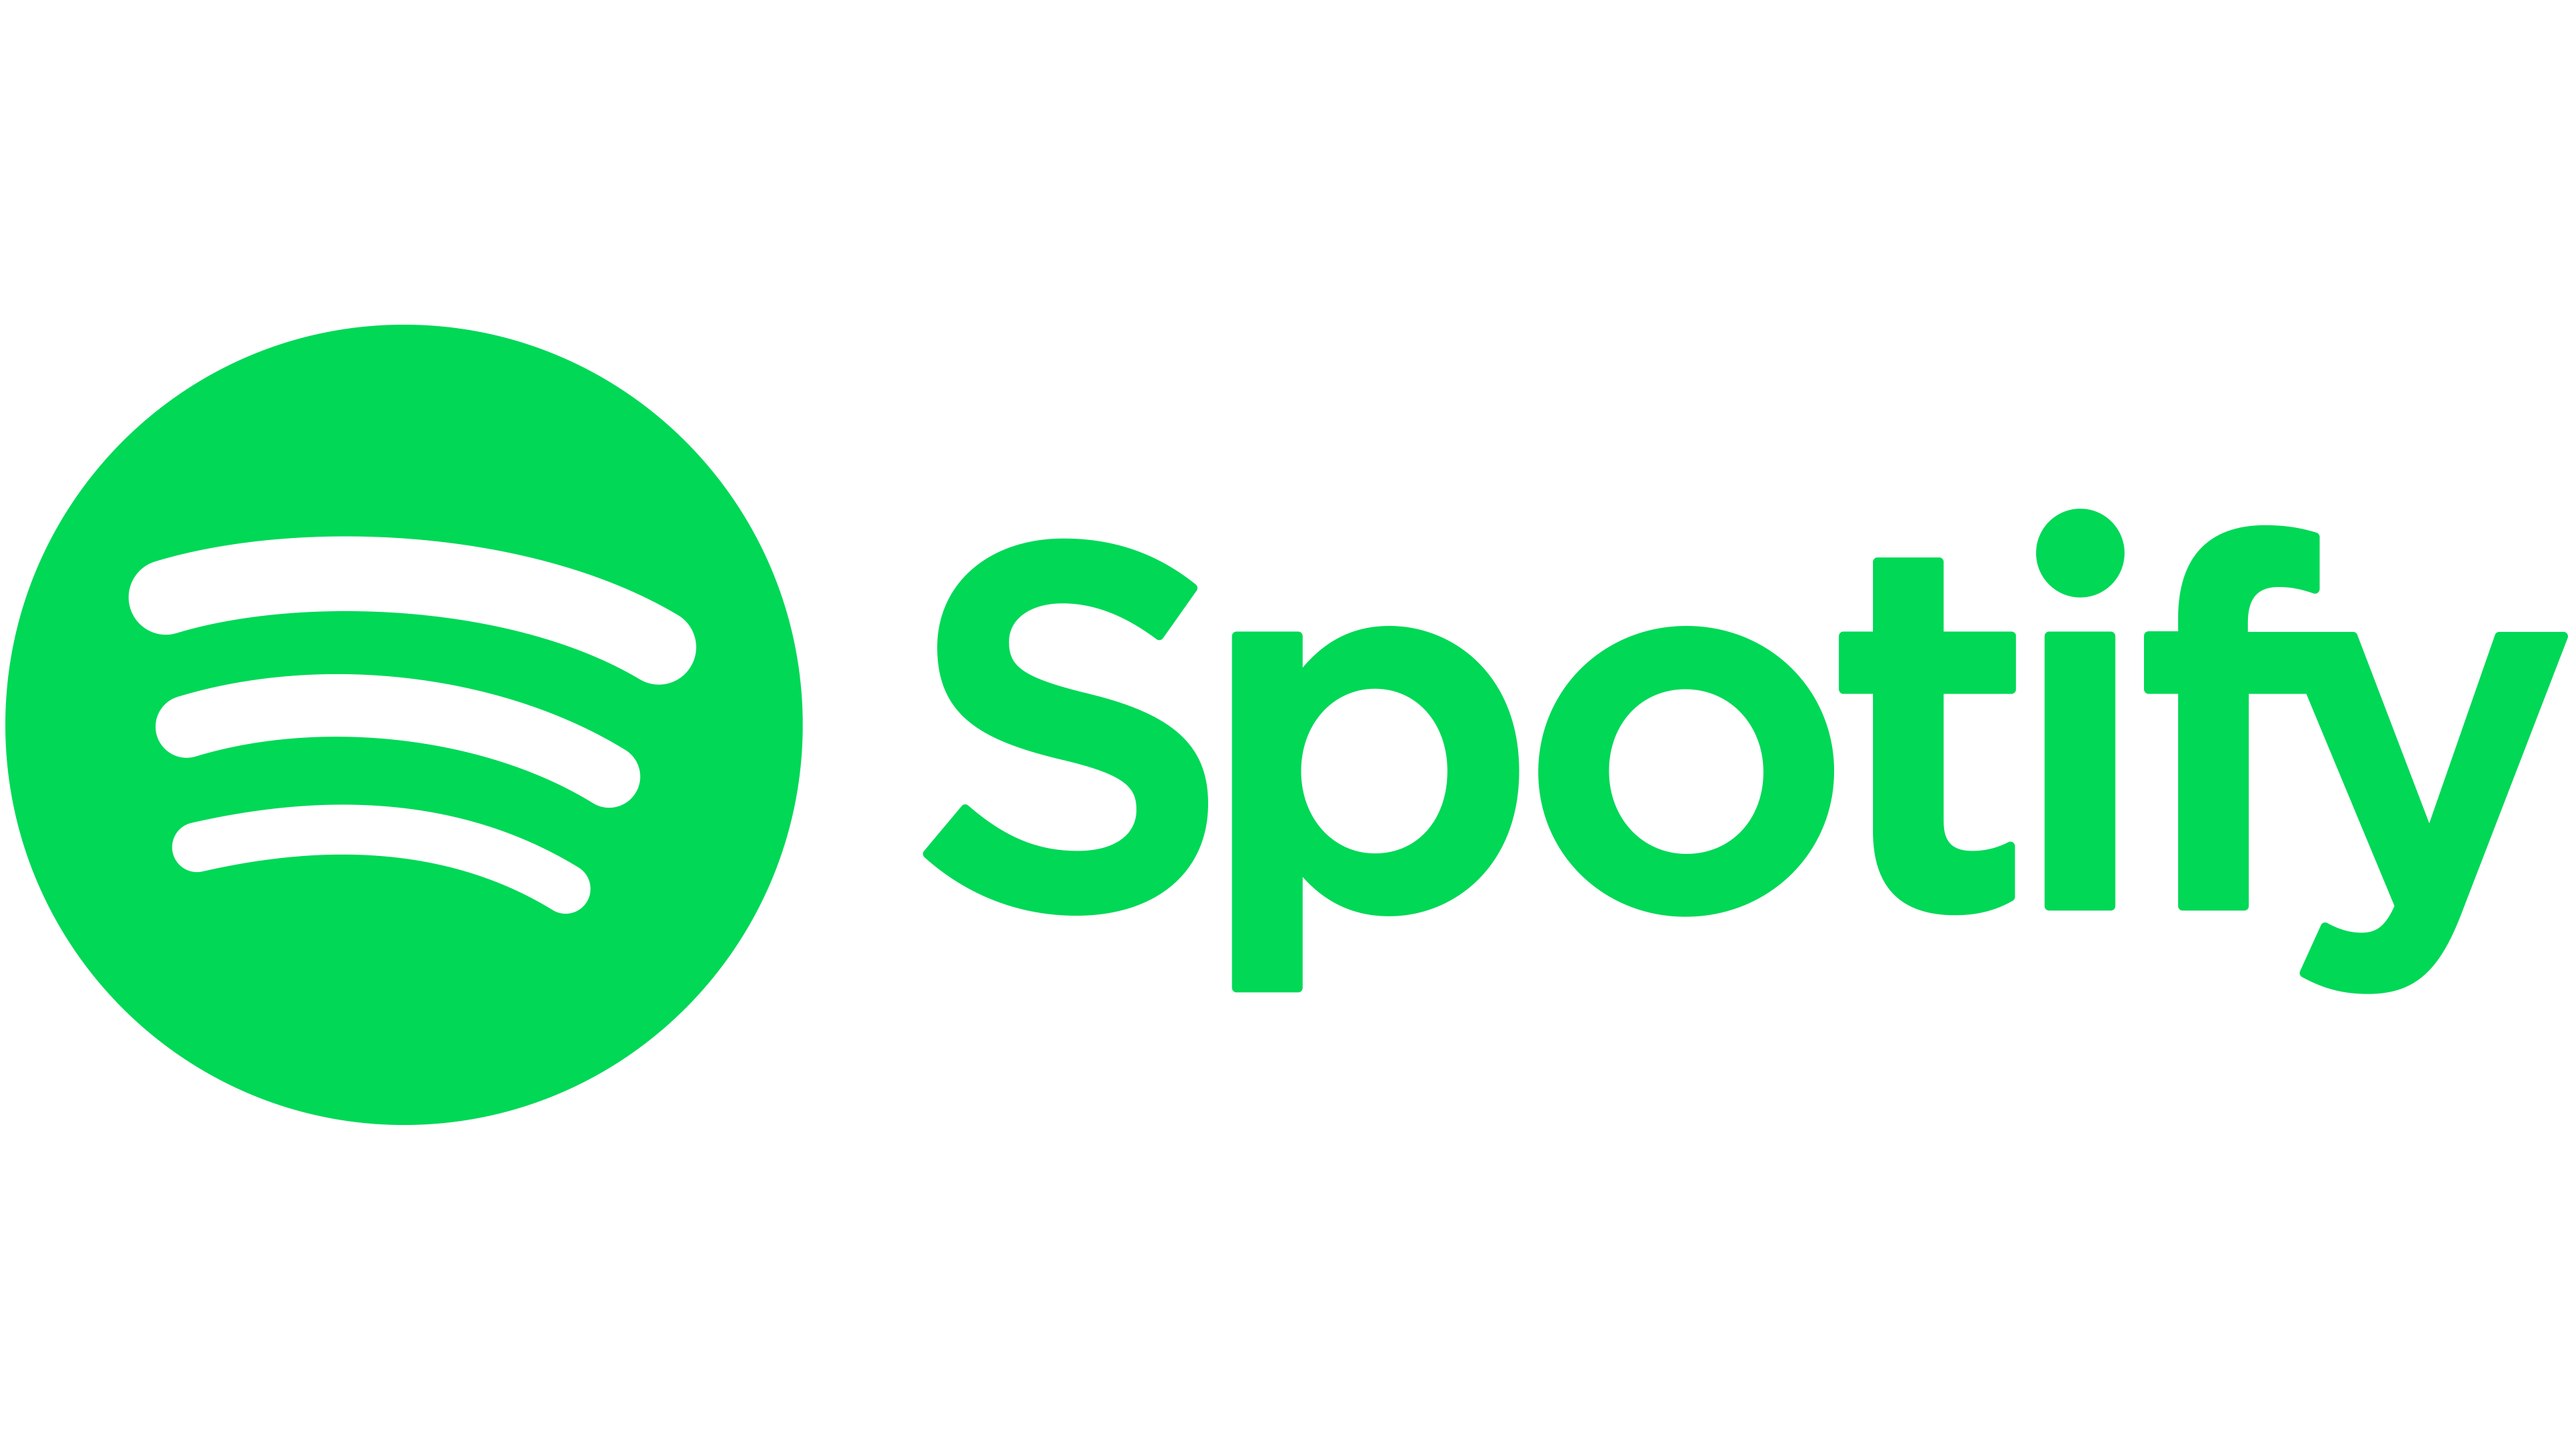

Através da base de dados do spotfy Brasil 2022, reponder as seguintes perguntas.

- Top 5 de artistas mais frequentes
- Top 5 de musica mais frequente
- Top 5 de genero musical mais frequente

- Desafio: Montar um mesmo top 5 apenas do seu genero musical favorito.

In [ ]:
import pandas as pd

url = '/content/drive/MyDrive/Colab Notebooks/Spotfy Brasil.xlsx'

In [ ]:
spotfy = pd.read_excel(url)

In [ ]:
spotfy

,ID,url_da_musica,ranking,nome_da_musica,nome_dos_artistas,artista_individual,id_artista,genero,img_artista,collab,...,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,18370,spotify:track:3hWLK4ew0rGtaFdjwcq1u4,135,180,"Alok, Mc Davi, MC Marks, Mc Dricka, MC Hariel,...",Alok,spotify:artist:0NGAZxHanS9e0iNHpR8f2W,electro house,https://i.scdn.co/image/ab6761610000e5eb83c76c...,1,...,4,0,-5.421000e+03,0.0833,0.152,0.002540,0.0914,0.396,9.199300e+04,193806
1,18371,spotify:track:3hWLK4ew0rGtaFdjwcq1u4,135,180,"Alok, Mc Davi, MC Marks, Mc Dricka, MC Hariel,...",Mc Davi,spotify:artist:1cYhx7ZOhYoVmnDPb9KMwo,funk ostentacao,https://i.scdn.co/image/ab6761610000e5ebe15583...,1,...,4,0,-5.421000e+03,0.0833,0.152,0.002540,0.0914,0.396,9.199300e+04,193806
2,18372,spotify:track:3hWLK4ew0rGtaFdjwcq1u4,135,180,"Alok, Mc Davi, MC Marks, Mc Dricka, MC Hariel,...",MC Marks,spotify:artist:04QHNiih9ZesPvals6II1h,funk carioca,https://i.scdn.co/image/ab6761610000e5ebb44eab...,1,...,6,0,-6.541000e+03,0.2680,0.378,0.000000,0.1360,0.516,1.331330e+16,141770
3,18373,spotify:track:3hWLK4ew0rGtaFdjwcq1u4,135,180,"Alok, Mc Davi, MC Marks, Mc Dricka, MC Hariel,...",Mc Dricka,spotify:artist:4d175LvxCzxt5vHbJyv49q,funk mtg,https://i.scdn.co/image/ab6761610000e5eb68e651...,1,...,6,0,-6.541000e+03,0.2680,0.378,0.000000,0.1360,0.516,1.331330e+16,141770
4,18374,spotify:track:3hWLK4ew0rGtaFdjwcq1u4,135,180,"Alok, Mc Davi, MC Marks, Mc Dricka, MC Hariel,...",MC Hariel,spotify:artist:0pcoadNMmvrUyab1RxWBoV,funk ostentacao,https://i.scdn.co/image/ab6761610000e5eb3cf96b...,1,...,6,0,-6.541000e+03,0.2680,0.378,0.000000,0.1360,0.516,1.331330e+16,141770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29482,24788,spotify:track:1hs2hRwPfyFLoYIf6jY1W7,188,Zero Saudade - Ao Vivo,"Os Barões Da Pisadinha, Maiara & Maraisa",Maiara & Maraisa,spotify:artist:59jlthNnbmim5l9tmNA7se,sertanejo pop,https://i.scdn.co/image/ab6761610000e5eb5c4fb6...,1,...,11,0,-2.506000e+03,0.0720,0.553,0.000003,0.2650,0.592,1.300380e+16,174759
29483,27805,spotify:track:1hs2hRwPfyFLoYIf6jY1W7,199,Zero Saudade - Ao Vivo,"Os Barões Da Pisadinha, Maiara & Maraisa",Os Barões Da Pisadinha,spotify:artist:5Lv2GUVwqmQBPwrTrxucE5,arrocha,https://i.scdn.co/image/ab6761610000e5eb4a51c3...,1,...,11,0,-2.506000e+03,0.0720,0.553,0.000003,0.2650,0.592,1.300380e+16,174759
29484,27806,spotify:track:1hs2hRwPfyFLoYIf6jY1W7,199,Zero Saudade - Ao Vivo,"Os Barões Da Pisadinha, Maiara & Maraisa",Maiara & Maraisa,spotify:artist:59jlthNnbmim5l9tmNA7se,sertanejo pop,https://i.scdn.co/image/ab6761610000e5eb5c4fb6...,1,...,11,0,-2.506000e+03,0.0720,0.553,0.000003,0.2650,0.592,1.300380e+16,174759
29485,28130,spotify:track:1hs2hRwPfyFLoYIf6jY1W7,199,Zero Saudade - Ao Vivo,"Os Barões Da Pisadinha, Maiara & Maraisa",Os Barões Da Pisadinha,spotify:artist:5Lv2GUVwqmQBPwrTrxucE5,forro,https://i.scdn.co/image/ab6761610000e5eb4a51c3...,1,...,11,0,-2.506000e+03,0.0720,0.553,0.000003,0.2650,0.592,1.300380e+16,174759


In [ ]:
spotfy.artista_individual.value_counts()

artista_individual
Marí­lia Mendonça         703
Henrique & Juliano        605
Os Barões Da Pisadinha    497
Gusttavo Lima             487
Joío Gomes                409
                         ... 
Major Lazer                 1
Mariah Carey                1
EoBronks                    1
Turma da Pisadinha          1
MC CH da Z.O                1
Name: count, Length: 745, dtype: int64

In [ ]:
ranking_artista = spotfy.artista_individual.value_counts()

In [ ]:
spotfy.nome_da_musica.value_counts()

nome_da_musica
Poesia Acústica 11: Nada Mudou      594
Poesia Acústica #9: Melhor Forma    590
Poesia Acústica #6: Era uma Vez     572
Set dos Casados                     440
A Cara do Crime (Nós Incomoda)      348
                                   ... 
Plan A                                1
Folgado - Ao Vivo                     1
SKIN OF MY TEETH                      1
Love í€ Queima Roupa - Ao Vivo        1
LALISA                                1
Name: count, Length: 1092, dtype: int64